In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Questions 1 et 2

,year,gnp,invest,cpi,interest,gnp_log,invest_log
0,1968,873.4,133.3,82.54,5.16,6.772394,4.892602
1,1969,944.0,149.3,86.79,5.87,6.850126,5.005958
2,1970,992.7,144.2,91.45,5.95,6.900429,4.971201
3,1971,1077.6,166.4,96.01,4.88,6.982492,5.114395
4,1972,1185.9,195.0,100.00,4.50,7.078257,5.273000


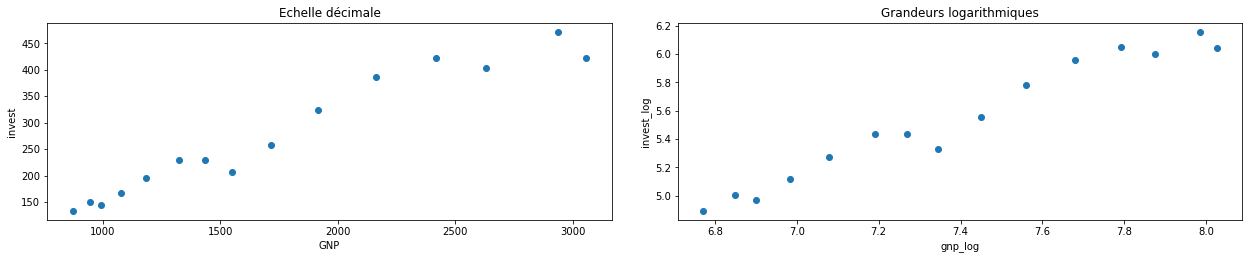

In [2]:
df = pd.read_csv("https://bitbucket.org/portierf/shared_files/downloads/invest.txt", sep = ' ') # chemin d'accès supprimé car comporte mon nom

fig, ax = plt.subplots(1,2)
fig.set_size_inches(18, 4)
fig.tight_layout(pad=3.5)

ax[0].scatter(df["gnp"], df["invest"])
ax[0].set_xlabel("GNP")
ax[0].set_ylabel("invest")
ax[0].set_title("Echelle décimale")

# Echelle logarithmique
df["gnp_log"] = np.log(df["gnp"])
df["invest_log"] = np.log(df["invest"])

ax[1].scatter(df["gnp_log"], df["invest_log"])
# ax[1].set_xscale("log")
# ax[1].set_yscale("log")
ax[1].set_xlabel("gnp_log")
ax[1].set_ylabel("invest_log")
ax[1].set_title("Grandeurs logarithmiques")

display(df.head())

### Question 3

On utilise les formules analytiques pour calculer $\theta_{0}$ et $\theta_{1}$  ou on calcule directement le vecteur $\hat{\theta}$ à l'aide de Z et Y
Pour le R2 : calculer les prédictions et utiliser la formule

Teta1 :  1.0152814015988707
Teta0 :  -1.9635913352301815

Teta (calculé vectoriellement) :  [-1.96359134  1.0152814 ]

Cov teta : 
 [[ 2.51593452 -0.33971029]
 [-0.33971029  0.04600925]]

Variance de teta0:  2.515934515891021  donc écart type de teta0 :  1.586169762632935
Variance de teta1:  0.04600925061404662  donc écart type de teta1 :  0.21449767041636283
R2 :  0.9627572956060393


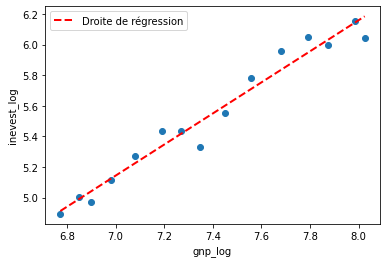

In [3]:
x = df["gnp_log"]
y = df["invest_log"]
n = len(x)


# Pente : formule explicite
teta1 = ((df["gnp_log"] - df["gnp_log"].mean())*(df["invest_log"] - df["invest_log"].mean())).sum()/(((df["gnp_log"] - df["gnp_log"].mean())**2).sum())
print("Teta1 : ", teta1)

# Intercept : formule explicite
yn_ = df["invest_log"].mean()
xn_ = df["gnp_log"].mean()
teta0 = yn_ - xn_*teta1
print("Teta0 : ", teta0)

# Intercept et pente : 2e méthode par calcul du vecteur estimateur
Z = np.ones((len(df["gnp_log"]), 2))
Z[: , 1] = df["gnp_log"]
teta = np.linalg.inv((Z.T)@Z)@(Z.T)@df["invest_log"]
print('\nTeta (calculé vectoriellement) : ', teta)

G = 1 / n * (Z.T@Z)

# Ecarts types des estimateurs
y_pred = Z@teta
Cov_teta = (1 / (n - np.linalg.matrix_rank(Z)) * ((y-y_pred)**2).sum()) * np.linalg.inv(G)
print("\nCov teta : \n", Cov_teta)
print("\nVariance de teta0: ", Cov_teta[0, 0], " donc écart type de teta0 : ", np.sqrt(Cov_teta[0, 0]))
print("Variance de teta1: ", Cov_teta[1, 1], " donc écart type de teta1 : ", np.sqrt(Cov_teta[1, 1]))

# Coefficient de détermination
print("R2 : " ,((y_pred - yn_)**2).sum() / ((y - yn_)**2).sum())

# Tracer nuage de points et droite de régression à partir des coefficients
plt.scatter(x,y)
plt.ylabel("inevest_log")
plt.xlabel("gnp_log")
plt.plot(x, teta0+teta1*x, 'r--', lw=2, label = 'Droite de régression')
plt.legend()

In [8]:
# Ecarts types des estimateurs
y_pred = Z@teta
Cov_teta = (1 / (n - np.linalg.matrix_rank(Z)) * ((y-y_pred)**2).sum()) * np.linalg.inv(G) / n
print("\nCov teta : \n", Cov_teta)
print("\nVariance de teta0: ", Cov_teta[0, 0], " donc écart type de teta0 : ", np.sqrt(Cov_teta[0, 0]))
print("Variance de teta1: ", Cov_teta[1, 1], " donc écart type de teta1 : ", np.sqrt(Cov_teta[1, 1]))


Cov teta : 
 [[ 0.16772897 -0.02264735]
 [-0.02264735  0.00306728]]

Variance de teta0:  0.16772896772606807  donc écart type de teta0 :  0.4095472716623419
Variance de teta1:  0.0030672833742697745  donc écart type de teta1 :  0.05538306035485737


### Questions 4

Faire un test de student avec $H_{0}$ : "la pente n'est pas significative" ie " teta1 = 0 "

On sait que rang(Z) = 2 car la colonne gnp_log n'est pas constante (donc n'est pas colinéaire avec le prédicteur constant).

On utilisera donc une loi de Student avec n-2 degrés de liberté.

In [570]:
y_hat = Z@teta
np.sqrt(((y - y_hat) ** 2).sum())

0.31589935299235006

In [571]:
rank_Z = np.linalg.matrix_rank(Z)
sigma_2 = np.sqrt(((y - y_hat) ** 2).sum()) / (n - rank_Z)

T_stat = (np.sqrt(n) * teta1) / np.sqrt(sigma_2 * np.linalg.inv(G)[1][1])

In [572]:
from scipy import stats
alpha = 0.05
print("T_stat = ", T_stat )
print("Région d'acceptation de H0 = ", str(stats.t(df= n - rank_Z).ppf((alpha/2, 1-alpha/2))))
print("\n H0 acceptée : " , abs(T_stat)<stats.t(df= n - rank_Z).ppf(1-alpha/2))
print('p_valeur : ' , 2 * stats.t(df= n - rank_Z).cdf(-abs(T_stat)))

T_stat =  10.30347801007883
Région d'acceptation de H0 =  [-2.16036866  2.16036866]

 H0 acceptée :  False
p_valeur :  1.2704813930289958e-07


La p_valeur étant très petite, sous H0, la probabilité d'otbenir une valeur plus extrème pour T est très faible. On peut donc penser avec une "forte" certitude que H0 est à rejeter.

### Bonus : 2e méthode pour calculer la p-valeur par itération
On initialise une valeur de alpha très grande (on définit donc un intervalle très restreint) puis on effectue un test de student sur cette valeur et la t_statistique calculée précédemment. Le test revient faux.
On itère le processus en diminuant à chaque fois la valeur de alpha

In [573]:
alpha_p = 0.25 # définition de alpha_p, qui convergera vers la p_valeur
passage_test = False
T_p = (np.sqrt(n) * teta1) / np.sqrt(sigma_2 * np.linalg.inv(G)[1][1])
while passage_test == False:
    passage_test = abs(T_stat)<stats.t(df= n - rank_Z).ppf(1-alpha_p/2) # Test de student pour la valeur alpha_p actuelle
    print(alpha_p)
    print(passage_test)
    alpha_p = alpha_p/1.01

0.25
False
0.24752475247524752
False
0.2450740123517302
False
0.2426475369819111
False
0.24024508612070405
False
0.2378664219016872
False
0.23551130881355167
False
0.23317951367678383
False
0.23087080562057805
False
0.22858495605997825
False
0.2263217386732458
False
0.22408092937945126
False
0.22186230631628837
False
0.2196656498181073
False
0.21749074239416563
False
0.2153373687070947
False
0.2132053155515789
False
0.21109437183324645
False
0.20900432854776876
False
0.2069349787601671
False
0.20488611758432385
False
0.20285754216269689
False
0.20084905164623454
False
0.19886044717448964
False
0.19689153185593034
False
0.19494211074844586
False
0.19301199084004542
False
0.19110098102974793
False
0.18920889210866132
False
0.18733553674124884
False
0.185480729446781
False
0.1836442865809713
False
0.18182602631779335
False
0.18002576863147857
False
0.17824333527869166
False
0.17647854978088282
False
0.17473123740681468
False
0.17300122515526206
False
0.17128834173788324
False
0.1695924175

0.0075303721096805845
False
0.007455813969980777
False
0.007381994029683937
False
0.007308904979885086
False
0.007236539584044639
False
0.00716489067727192
False
0.007093951165615763
False
0.0070237140253621416
False
0.006954172302338754
False
0.006885319111226489
False
0.006817147634877712
False
0.006749651123641299
False
0.006682822894694356
False
0.00661665633138055
False
0.006551144882555
False
0.006486282061935643
False
0.006422061447461032
False
0.006358476680654488
False
0.0062955214659945425
False
0.0062331895702916265
False
0.006171474822070917
False
0.006110371110961304
False
0.0060498723870904
False
0.005989972660485544
False
0.005930666000480737
False
0.005871946535129443
False
0.005813808450623211
False
0.00575624599071605
False
0.005699253456154505
False
0.005642825204113372
False
0.0055869556476370015
False
0.00553163925508614
False
0.005476870549590238
False
0.005422644108505186
False
0.005368954562876421
False
0.005315796596907348
False
0.005263164947433017
False
0.005

0.00030270019824684595
False
0.0002997031665810356
False
0.00029673580849607484
False
0.0002937978301941335
False
0.00029088894078627077
False
0.0002880088522636344
False
0.00028515727946894497
False
0.00028233394006826234
False
0.000279538554523032
False
0.0002767708460624079
False
0.00027403054065584944
False
0.00027131736698598953
False
0.0002686310564217718
False
0.0002659713429918533
False
0.0002633379633582706
False
0.0002607306567903669
False
0.00025814916513897714
False
0.00025559323281086843
False
0.0002530626067434341
False
0.00025055703637963774
False
0.00024807627364320566
False
0.00024562007291406503
False
0.00024318819100402477
False
0.0002407803871326978
False
0.00023839642290366119
False
0.00023603606228085266
False
0.00023369907156520065
False
0.0002313852193714858
False
0.00022909427660543148
False
0.00022682601644102127
False
0.00022458021429804087
False
0.00022235664781984244
False
0.00022015509685132916
False
0.00021797534341715758
False
0.00021581717170015603
Fals

1.2536407337466917e-05
False
1.2412284492541501e-05
False
1.2289390586674754e-05
False
1.2167713452153222e-05
False
1.2047241041735864e-05
False
1.1927961427461252e-05
False
1.1809862799466585e-05
False
1.1692933464818401e-05
False
1.1577161846354853e-05
False
1.1462536481539458e-05
False
1.1349046021326196e-05
False
1.1236679229035837e-05
False
1.1125424979243402e-05
False
1.1015272256676636e-05
False
1.0906210155125382e-05
False
1.0798227876361765e-05
False
1.0691314729071053e-05
False
1.0585460127793122e-05
False
1.0480653591874378e-05
False
1.0376884744430078e-05
False
1.0274143311316909e-05
False
1.0172419120115751e-05
False
1.0071702099124506e-05
False
9.971982276360897e-06
False
9.873249778575146e-06
False
9.775494830272422e-06
False
9.678707752744972e-06
False
9.582878963113833e-06
False
9.487998973380033e-06
False
9.39405838948518e-06
False
9.301047910381367e-06
False
9.208958327110265e-06
False
9.11778052189135e-06
False
9.027505467219159e-06
False
8.938124224969465e-06
False

5.678398254975755e-07
False
5.622176490075004e-07
False
5.566511376311885e-07
False
5.511397402288995e-07
False
5.456829111177223e-07
False
5.402801100175468e-07
False
5.349308019975711e-07
False
5.296344574233378e-07
False
5.243905519042948e-07
False
5.191985662418761e-07
False
5.140579863780951e-07
False
5.089683033446486e-07
False
5.039290132125234e-07
False
4.989396170421023e-07
False
4.939996208337647e-07
False
4.891085354789749e-07
False
4.842658767118564e-07
False
4.794711650612439e-07
False
4.747239258032118e-07
False
4.700236889140711e-07
False
4.6536998902383276e-07
False
4.6076236537013144e-07
False
4.5620036175260535e-07
False
4.5168352648772804e-07
False
4.4721141236408714e-07
False
4.4278357659810606e-07
False
4.38399580790204e-07
False
4.340589908813901e-07
False
4.297613771102872e-07
False
4.255063139705814e-07
False
4.2129338016889245e-07
False
4.171221585830618e-07
False
4.1299223622085326e-07
False
4.0890320417906265e-07
False
4.0485465760303233e-07
False
4.008461956

### Question 5

Simulation pour GNP = 1000


In [574]:
# Valeur prédite pour GNP = 1000
z_gnp1k = np.array([1, np.log(1000)])
y_pred_gnp1k = z_gnp1k@teta
print("y prédit pour gnp = 1000 :  ", np.exp(y_pred_gnp1k))

# Quantile de la loi de Student pour alpha = 0.1
t = stats.t(df= n - rank_Z).ppf(0.1/2)
a_ci = abs(t) * np.sqrt(sigma_2) * np.sqrt(z_gnp1k.T@(np.linalg.inv((Z.T@Z)))@z_gnp1k)
a_pi = abs(t) * np.sqrt(sigma_2) * np.sqrt(1 + z_gnp1k.T@(np.linalg.inv((Z.T@Z)))@z_gnp1k)

CI = [y_pred_gnp1k - a_ci, y_pred_gnp1k + a_ci]
PI = [y_pred_gnp1k - a_pi, y_pred_gnp1k + a_pi]


print("Intervalle de confiance CI pour GNP=1000", np.exp(CI))
print("Intervalle de confiance PI pour GNP=1000", np.exp(PI))

y prédit pour gnp = 1000 :   155.97942793102862
Intervalle de confiance CI pour GNP=1000 [139.81230313 174.01603001]
Intervalle de confiance PI pour GNP=1000 [115.90463688 209.91034175]


### Question 6

In [575]:
# On écrit les fonctions permettant de calculer les intervalles de confiance

def get_CI(z, alpha):
    """
    Donne la valeur à ajouter/soustraire à la prédiction obtenue à partir de z pour avoir 
    son intervalle de confiance PI de niveau alpha
    """
    y_pred = z@teta
    t = stats.t(df= n - rank_Z).ppf(alpha/2) # On récupère la valeur du quantile correspondant à alpha/2 de la loi de Student
    a_ci = abs(t) * np.sqrt(sigma_2) * np.sqrt(z.T@(np.linalg.inv((Z.T@Z)))@z)
    return a_ci

def get_PI(z, alpha):
    """
    Donne la valeur à ajouter/soustraire à la prédiction obtenue à partir de z pour avoir 
    son intervalle de confiance PI de niveau alpha
    """
    y_pred = z@teta
    t = stats.t(df= n - rank_Z).ppf(alpha/2)
    a_pi = abs(t) * np.sqrt(sigma_2) * np.sqrt(1+z.T@(np.linalg.inv((Z.T@Z)))@z)
    return a_pi

# Calcul des points des intervalles de confiance
CI_borne_sup = y_pred + [get_CI(z,0.1) for z in Z]
CI_borne_inf = y_pred - [get_CI(z,0.1) for z in Z]
PI_borne_sup = y_pred + [get_PI(z,0.1) for z in Z]
PI_borne_inf = y_pred - [get_PI(z,0.1) for z in Z]

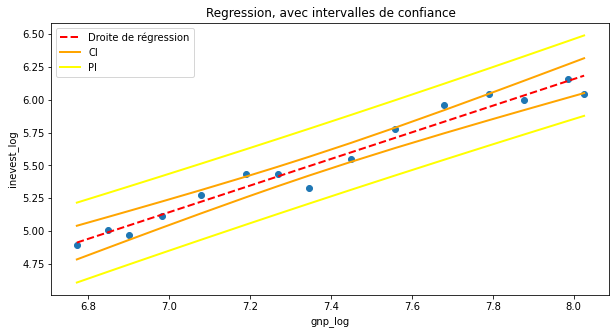

In [576]:
# Visualisation
# Tracer nuage de points et droite de régression à partir des coefficients

plt.rcParams['figure.figsize'] = [10, 5]

plt.scatter(x,y)
plt.ylabel("inevest_log")
plt.xlabel("gnp_log")
plt.plot(x, teta0+teta1*x, 'r--', lw=2, label = 'Droite de régression')

plt.plot(x, CI_borne_sup, 'orange', lw=2, label = 'CI')
plt.plot(x, CI_borne_inf, 'orange', lw=2)

plt.plot(x, PI_borne_sup, 'yellow', lw=2, label = 'PI')
plt.plot(x, PI_borne_inf, 'yellow', lw=2)

plt.title("Regression, avec intervalles de confiance")

plt.legend()

### Question 7

In [577]:
from sklearn.linear_model import LinearRegression
X = np.array(x).reshape(-1, 1)

reg = LinearRegression(fit_intercept=True).fit(X,y)
y_pred = reg.predict(X)

In [578]:
# Vérification des coefficients calculés précédemment
import math
print("Coefficients trouvés par le module LinearRegression() : ", reg.intercept_, reg.coef_)
print("Coefficients trouvés manuellement : ", teta)
print("Les coefficients calculés manuellement et trouvés par le modèle sont égaux : ", pd.Series((np.array([reg.intercept_, reg.coef_[0]]) - np.array(teta))).apply(lambda x : math.isclose(x, 0, abs_tol = 1e-09)).all())

# Prédiction pour le cas GNP = 1000
y_pred_1000GNP = np.exp(reg.predict([[np.log(1000)]]))[0]
print("Prédiction du modèle pour GNP = 1000 : ",y_pred_1000GNP)

print("R2 : " ,reg.score(X,y))

Coefficients trouvés par le module LinearRegression() :  -1.9635913352301815 [1.0152814]
Coefficients trouvés manuellement :  [-1.96359134  1.0152814 ]
Les coefficients calculés manuellement et trouvés par le modèle sont égaux :  True
Prédiction du modèle pour GNP = 1000 :  155.97942793105494
R2 :  0.9627572956057855


### Question 8

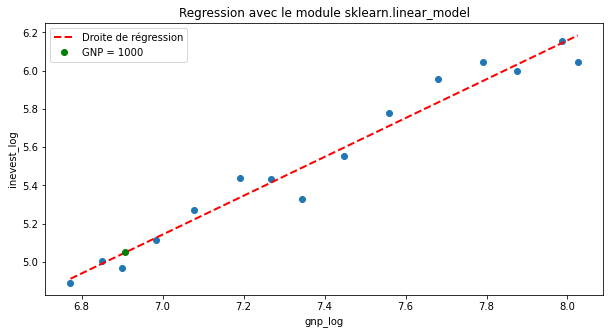

In [579]:
plt.scatter(x,y)
plt.ylabel("inevest_log")
plt.xlabel("gnp_log")
plt.plot(X,y_pred, 'r--', lw=2, label = 'Droite de régression')
plt.plot(np.log(1000), np.log(y_pred_1000GNP) , 'go', color = 'green', label='GNP = 1000')
plt.title("Regression avec le module sklearn.linear_model")
plt.legend()

<span style='color:Green'> 
L'intervalle doit-il nécessairement être centré en la valeur prédite ?   

Est-ce normal que l'intervalle de confiance se resserre au milieu ? Si oui pourquoi ?

</span>

In [580]:
# print(np.exp(CI).mean())
# np.exp(PI).mean()

### Question 9

On va calculer la matrice de Gram puis regarder si ses colonnes sont colinéaires.

In [581]:
Z = np.ones((len(df["gnp_log"]), 3))
Z[: , 1] = df["gnp_log"]
Z[: , 2] = df["interest"]
np.linalg.matrix_rank(Z.T@Z)

3

$Z^{T}Z$ est de plein rang donc inversible

### Question 10

On va se servir de la formule explicite pour calculer le vecteur $\theta$

On caclulera ensuite $Cov(\theta)$ et le R²

Pour le test de Student on supposera tour à tour que chaque coefficient est nul. On prendra pour statistique de test pivotale sous $H_{0}$ la formule du cours pour tester la nullité de coefficients.

Le calcul de la p-valeur se fera en recherchant la probabilité d'obtenir une valeur plus "bizarre" pour la statistique de test et nous aidera à affiner notre niveau de certitude quand à l'acceptation ou non.

In [582]:
teta = np.linalg.inv((Z.T)@Z)@(Z.T)@df["invest_log"]
teta

array([-2.18045473,  1.05124269, -0.00652888])

In [583]:
# Calcul des prérequis : rang(Z), y prédit, sigma²
rank_Z = np.linalg.matrix_rank(Z)
y_hat = Z@teta
sigma_2 = np.sqrt(((y - y_hat) ** 2).sum()) / (n - rank_Z)

# Calcul de la covariance de teta
Cov_teta = (1 / (n - rank_Z) * ((y-y_hat)**2).sum()) * np.linalg.inv(Z.T@Z)
print("\nCov teta : \n", Cov_teta)

# Affichage des variances et écarts-types de chaque coefficient
print("\nVariance de teta0: ", Cov_teta[0, 0], " donc écart type de teta0 : ", np.sqrt(Cov_teta[0, 0]))
print("Variance de teta1: ", Cov_teta[1, 1], " donc écart type de teta1 : ", np.sqrt(Cov_teta[1, 1]))
print("Variance de teta2: ", Cov_teta[2, 2], " donc écart type de teta2 : ", np.sqrt(Cov_teta[2, 2]))

# Coefficient de détermination
print("R2 : " ,((y_hat - yn_)**2).sum() / ((y - yn_)**2).sum())


Cov teta : 
 [[ 4.38772697e-01 -6.72457405e-02  7.82053357e-03]
 [-6.72457405e-02  1.04165249e-02 -1.29683702e-03]
 [ 7.82053357e-03 -1.29683702e-03  2.35444629e-04]]

Variance de teta0:  0.4387726972412736  donc écart type de teta0 :  0.6623991977963694
Variance de teta1:  0.010416524891898812  donc écart type de teta1 :  0.10206137806192317
Variance de teta2:  0.00023544462909531384  donc écart type de teta2 :  0.015344205065604207
R2 :  0.9633108306726904


In [584]:
alpha = 0.95

# Test de student pour teta1
T_stat = (np.sqrt(n) * teta[1]) / np.sqrt(sigma_2 * np.linalg.inv(1 / n * Z.T@Z)[1][1])
print('t_statistique pour teta1 : ', T_stat)
print('p_valeur pour teta1: ' , 2 * stats.t(df= n - rank_Z).cdf(-abs(T_stat)))

# Test de student pour teta1
T_stat = (np.sqrt(n) * teta[2]) / np.sqrt(sigma_2 * np.linalg.inv(1 / n * Z.T@Z)[2][2])
print('\nt_statistique pour teta2 : ', T_stat)
print('p_valeur pour teta2: ' , 2 * stats.t(df= n - rank_Z).cdf(-abs(T_stat)))

t_statistique pour teta1 :  5.767533117043259
p_valeur pour teta1:  8.914866861100095e-05

t_statistique pour teta2 :  -0.23825541966862296
p_valeur pour teta2:  0.8157028412147808


On peut raisonnablement penser que teta1 est plus significatif que teta2.

Pour teta2, sous $H_0$ c'est à dire si on considère que teta2 = 0, on a 81% de chances d'observer des données plus invraisemblables que celles que nous observons. On ne peut donc pas conclure que teta2 != 0

Pour teta1 à l'inverse, la faible p_valeur liée à l'hypothèse $H_0$ peut nous amener à pencher vers un rejet de $H_0$ avec une forte confiance. En effet on aurait moins de 0.1 % de chances d'observer ces observations si $H_0$ était vraie

### Question 11

Application pour un point particulier.
Le niveau de confiance étant 99.9% on s'attend à des intervalles relativement larges.

In [591]:
# Prédiction de log_investment
z = np.array([1, np.log(1000), 10])
y_pred = z.T@teta
print( 'La valeur prédite de investment par le modèle est : ', np.exp(y_pred))

La valeur prédite de investment par le modèle est :  150.8044147209209


In [586]:
# Quantile de la loi de Student pour alpha = 0.001
t = stats.t(df= n - rank_Z).ppf(0.001/2)
a_ci = abs(t) * np.sqrt(sigma_2) * np.sqrt(z.T@(np.linalg.inv((Z.T@Z)))@z)
a_pi = abs(t) * np.sqrt(sigma_2) * np.sqrt(1 + z.T@(np.linalg.inv((Z.T@Z)))@z)

CI = [y_pred - a_ci, y_pred + a_ci]
PI = [y_pred - a_pi, y_pred + a_pi]


print("Intervalle de confiance CI pour GNP=1000", np.exp(CI))
print("Intervalle de confiance PI pour GNP=1000", np.exp(PI))

Intervalle de confiance CI pour GNP=1000 [ 77.08061512 295.04138577]
Intervalle de confiance PI pour GNP=1000 [ 57.2665352  397.12497742]


### Question 12

In [605]:
x = df["gnp_log"]
y = df["interest"]
z = df["invest_log"]

x_plan = np.linspace(x.min(),x.max(),100)
y_plan = np.linspace(y.min(),y.max(),100)
x_plan, y_plan = np.meshgrid(x_plan, y_plan)
z_plan = teta[0] + teta[1] * x_plan + teta[2] * y_plan

#### Calcul des plans d'intervalle de confiance ####
z_plan_CI_bornesup = np.ones(x_plan.shape) # On initialise
for i in range(len(x_plan)):
    for j in range(len(y_plan)):
        z_plan_CI_bornesup[i][j] = get_CI(np.array([1, x_plan[i][j],y_plan[i][j]]), 0.001) + teta[0] + teta[1] * x_plan[i][j] + teta[2] * y_plan[i][j]

z_plan_CI_borneinf = np.ones(x_plan.shape) # On initialise
for i in range(len(x_plan)):
    for j in range(len(y_plan)):
        z_plan_CI_borneinf[i][j] = -get_CI(np.array([1, x_plan[i][j],y_plan[i][j]]), 0.001) + teta[0] + teta[1] * x_plan[i][j] + teta[2] * y_plan[i][j]

z_plan_PI_bornesup = np.ones(x_plan.shape) # On initialise
for i in range(len(x_plan)):
    for j in range(len(y_plan)):
        z_plan_PI_bornesup[i][j] = get_PI(np.array([1, x_plan[i][j],y_plan[i][j]]), 0.001) + teta[0] + teta[1] * x_plan[i][j] + teta[2] * y_plan[i][j]

z_plan_PI_borneinf = np.ones(x_plan.shape) # On initialise
for i in range(len(x_plan)):
    for j in range(len(y_plan)):
        z_plan_PI_borneinf[i][j] = -get_PI(np.array([1, x_plan[i][j],y_plan[i][j]]), 0.001) + teta[0] + teta[1] * x_plan[i][j] + teta[2] * y_plan[i][j]

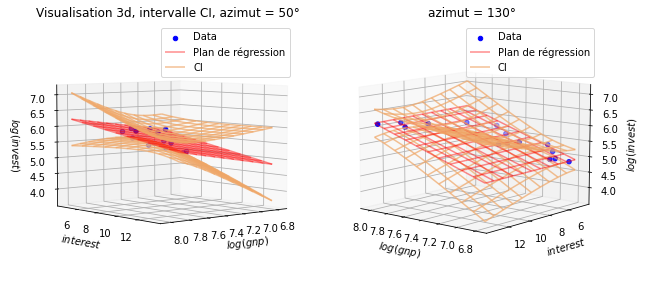

In [664]:
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

for ax in [ax1, ax2] :
    ax.scatter(x, y, z, c = 'b',  label = 'Data')   
    ax.plot_wireframe(x_plan, y_plan, z_plan, rstride=10, cstride=10, alpha = 0.45, color ='r', label = 'Plan de régression')
    ax.plot_wireframe(x_plan, y_plan, z_plan_CI_bornesup, rstride=10, cstride=10, alpha = 0.7, color ='#EFA666', label = 'CI')
    ax.plot_wireframe(x_plan, y_plan, z_plan_CI_borneinf, rstride=10, cstride=10, alpha = 0.7, color ='#EFA666')
    
    ax.set_xlabel('$log(gnp)$', fontsize=10, rotation=150)
    ax.set_ylabel('$interest$')
    ax.set_zlabel(r'$log(invest)$', fontsize=10, rotation=60)
    ax.legend()
    
ax1.view_init(elev=5, azim=50)
ax1.set_title("Visualisation 3d, intervalle CI, azimut = 50°")
ax2.view_init(elev=10, azim=130)
ax2.set_title("azimut = 130°")
plt.show()

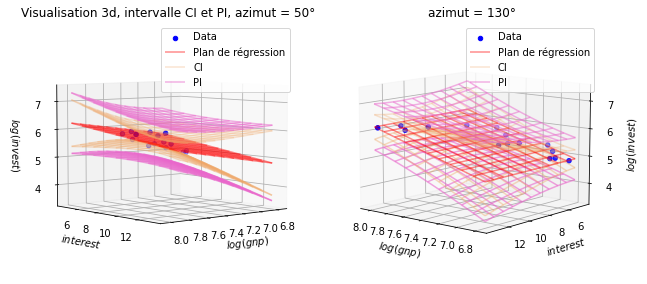

In [660]:
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

for ax in [ax1, ax2] :
    ax.scatter(x, y, z, c = 'b',  label = 'Data')   
    ax.plot_wireframe(x_plan, y_plan, z_plan, rstride=10, cstride=10, alpha = 0.45, color ='r', label = 'Plan de régression')
    ax.plot_wireframe(x_plan, y_plan, z_plan_CI_bornesup, rstride=10, cstride=10, alpha = 0.3, color ='#EFA666', label = 'CI')
    ax.plot_wireframe(x_plan, y_plan, z_plan_CI_borneinf, rstride=10, cstride=10, alpha = 0.4, color ='#EFA666')
    
    ax.plot_wireframe(x_plan, y_plan, z_plan_PI_bornesup, rstride=10, cstride=10, alpha = 0.5, color ='#E966CB', label = 'PI')
    ax.plot_wireframe(x_plan, y_plan, z_plan_PI_borneinf, rstride=10, cstride=10, alpha = 0.6, color ='#E966CB')
    ax.set_xlabel('$log(gnp)$', fontsize=10, rotation=150)
    ax.set_ylabel('$interest$')
    ax.set_zlabel(r'$log(invest)$', fontsize=10, rotation=60)
    ax.legend()
    
ax1.view_init(elev=5, azim=50)
ax1.set_title("Visualisation 3d, intervalle CI et PI, azimut = 50°")
ax2.view_init(elev=10, azim=130)
ax2.set_title("azimut = 130°")
plt.show()

### Question 13

On vérifie les question précédentes avec le module LinearRegression()

In [676]:
reg = LinearRegression(fit_intercept=True)

X = df[['gnp_log', 'interest']]
y = df['invest_log']
reg.fit(X,y)

print("Intercept trouvé par le module LinearRegression() : ", reg.intercept_)
print("Coefficients trouvés par le module LinearRegression() : ",  reg.coef_)
print("Coefficients trouvés manuellement : ", teta)
# # Vérification des coefficients calculés précédemment
print("Les coefficients calculés manuellement et trouvés par le modèle sont égaux : ", pd.Series((np.array([reg.intercept_, reg.coef_[0], reg.coef_[1]]) - np.array(teta))).apply(lambda x : math.isclose(x, 0, abs_tol = 1e-09)).all())


# # Prédiction pour le cas GNP = 1000
y_pred_1000GNP = np.exp(reg.predict([[np.log(1000), 10]]))[0]
print("Prédiction du modèle pour GNP = 1000 : ",y_pred_1000GNP)

print("R2 : " ,reg.score(X,y))

Intercept trouvé par le module LinearRegression() :  -2.1804547259114004
Coefficients trouvés par le module LinearRegression() :  [ 1.05124269 -0.00652888]
Coefficients trouvés manuellement :  [-2.18045473  1.05124269 -0.00652888]
Les coefficients calculés manuellement et trouvés par le modèle sont égaux :  True
Prédiction du modèle pour GNP = 1000 :  150.8044147208712
R2 :  0.9633108306726244


Les valeurs trouvées par le module LinearRegression sont cohérentes avec celles trouvées manuellement.